In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!ls

sample_data


In [6]:
!wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv

--2024-07-03 13:54:05--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36263 (35K) [text/plain]
Saving to: ‘planets.csv’

planets.csv         100%[===================>]  35.41K  --.-KB/s    in 0.01s   

2024-07-03 13:54:06 (3.40 MB/s) - ‘planets.csv’ saved [36263/36263]



!rm -rf pl*


In [7]:
ds = pd.read_csv('planets.csv')

In [8]:
ds.isnull().sum()['mass']


522

In [9]:
ds.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [11]:
ds.shape

(1035, 6)

In [12]:
(ds.isnull().sum()/ds.shape[0])*100

method             0.000000
number             0.000000
orbital_period     4.154589
mass              50.434783
distance          21.932367
year               0.000000
dtype: float64

In [13]:
(ds.notnull().sum().sum()/(ds.shape[0]*ds.shape[1])) *100

87.2463768115942

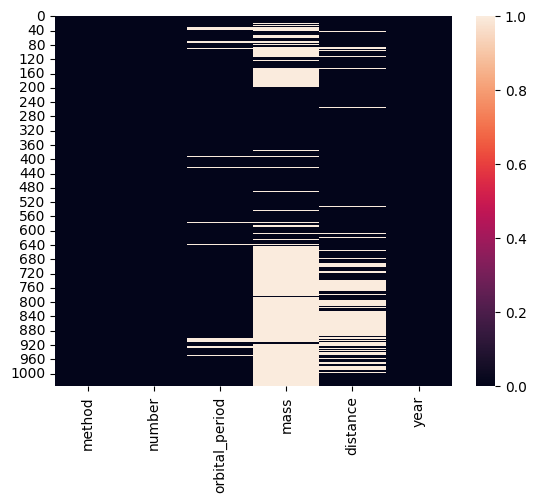

In [14]:
sns.heatmap(ds.isnull())
plt.show()

In [15]:
ds['mass'].fillna(ds['mass'].mode()[0], inplace=True)

In [16]:
for i in ds.select_dtypes(include="float64").columns:
    ds[i].fillna(ds[i].mode()[0], inplace=True)

In [17]:
from sklearn.impute import SimpleImputer
s = SimpleImputer(strategy= 'mean')

ar = s.fit_transform(ds[['mass']])
ar

array([[7.1 ],
       [2.21],
       [2.6 ],
       ...,
       [1.8 ],
       [1.8 ],
       [1.8 ]])

In [18]:
new_ds = pd.DataFrame(ar, columns=['mass'])

In [19]:
ds[['mass']]

,mass
0,7.10
1,2.21
2,2.60
3,19.40
4,10.50
...,...
1030,1.80
1031,1.80
1032,1.80
1033,1.80


In [20]:
ds.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [21]:
ds['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
ohe = OneHotEncoder()
arr = ohe.fit_transform(ds[['method']]).toarray()
arr

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
s_ds = pd.DataFrame(arr, columns=['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'])

In [25]:
s_ds

,Radial Velocity,Imaging,Eclipse Timing Variations,Transit,Astrometry,Transit Timing Variations,Orbital Brightness Modulation,Microlensing,Pulsar Timing,Pulsation Timing Variations
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
s_ds.isnull().sum()


Radial Velocity                  0
Imaging                          0
Eclipse Timing Variations        0
Transit                          0
Astrometry                       0
Transit Timing Variations        0
Orbital Brightness Modulation    0
Microlensing                     0
Pulsar Timing                    0
Pulsation Timing Variations      0
dtype: int64

In [28]:
ds


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,1.80,172.00,2006
1031,Transit,1,2.615864,1.80,148.00,2007
1032,Transit,1,3.191524,1.80,174.00,2007
1033,Transit,1,4.125083,1.80,293.00,2008


In [31]:
import random
ds['interested'] = np.array([random.choice(['yes', 'no']) for _ in range(1035)])

In [32]:
ds

,method,number,orbital_period,mass,distance,year,interested
0,Radial Velocity,1,269.300000,7.10,77.40,2006,no
1,Radial Velocity,1,874.774000,2.21,56.95,2008,yes
2,Radial Velocity,1,763.000000,2.60,19.84,2011,yes
3,Radial Velocity,1,326.030000,19.40,110.62,2007,no
4,Radial Velocity,1,516.220000,10.50,119.47,2009,no
...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,1.80,172.00,2006,no
1031,Transit,1,2.615864,1.80,148.00,2007,yes
1032,Transit,1,3.191524,1.80,174.00,2007,no
1033,Transit,1,4.125083,1.80,293.00,2008,yes


In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
le = OrdinalEncoder(categories=[['yes', 'no']], dtype=np.int16)
ds['interested_enc'] = le.fit_transform(ds[['interested']])
ds

,method,number,orbital_period,mass,distance,year,interested,interested_enc
0,Radial Velocity,1,269.300000,7.10,77.40,2006,no,1
1,Radial Velocity,1,874.774000,2.21,56.95,2008,yes,0
2,Radial Velocity,1,763.000000,2.60,19.84,2011,yes,0
3,Radial Velocity,1,326.030000,19.40,110.62,2007,no,1
4,Radial Velocity,1,516.220000,10.50,119.47,2009,no,1
...,...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,1.80,172.00,2006,no,1
1031,Transit,1,2.615864,1.80,148.00,2007,yes,0
1032,Transit,1,3.191524,1.80,174.00,2007,no,1
1033,Transit,1,4.125083,1.80,293.00,2008,yes,0


In [49]:
ds['interested_enc_map'] = ds['interested'].map({'yes':0, 'no': 1})

In [52]:
ds.isnull()

,method,number,orbital_period,mass,distance,year,interested,interested_enc,interested_enc_map
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1030,False,False,False,False,False,False,False,False,False
1031,False,False,False,False,False,False,False,False,False
1032,False,False,False,False,False,False,False,False,False
1033,False,False,False,False,False,False,False,False,False


In [66]:
sample = pd.DataFrame({"random_vals": [0.1, 0.5, 0.5, 0, 0.8, 0.3, 0.9, 0.467]})
sample

,random_vals
0,0.100
1,0.500
2,0.500
3,0.000
4,0.800
5,0.300
6,0.900
7,0.467


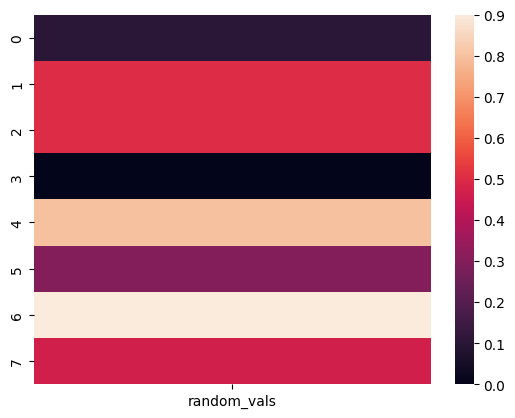

In [67]:
sns.heatmap(sample)
plt.show()

In [68]:
ds


,method,number,orbital_period,mass,distance,year,interested,interested_enc,interested_enc_map
0,Radial Velocity,1,269.300000,7.10,77.40,2006,no,1,1
1,Radial Velocity,1,874.774000,2.21,56.95,2008,yes,0,0
2,Radial Velocity,1,763.000000,2.60,19.84,2011,yes,0,0
3,Radial Velocity,1,326.030000,19.40,110.62,2007,no,1,1
4,Radial Velocity,1,516.220000,10.50,119.47,2009,no,1,1
...,...,...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,1.80,172.00,2006,no,1,1
1031,Transit,1,2.615864,1.80,148.00,2007,yes,0,0
1032,Transit,1,3.191524,1.80,174.00,2007,no,1,1
1033,Transit,1,4.125083,1.80,293.00,2008,yes,0,0


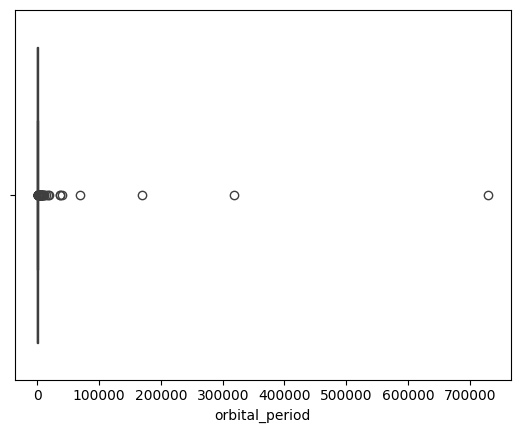

In [76]:
sns.boxplot(x='orbital_period', data =ds)
plt.show()



<ipython-input-77-8dd0ce8b0aae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['orbital_period'])


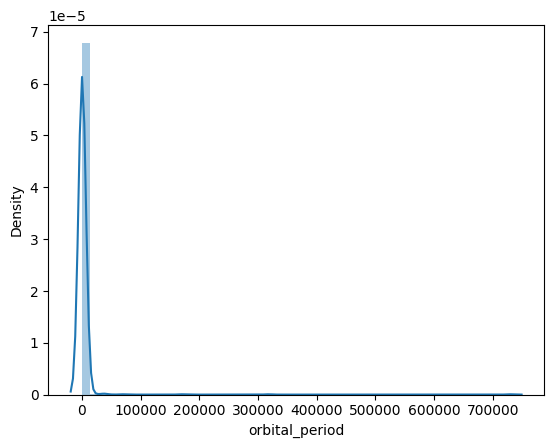

In [77]:
sns.distplot(ds['orbital_period'])
plt.show()

In [75]:
ds.describe()

,number,orbital_period,mass,distance,year,interested_enc,interested_enc_map
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,1.785507,1924.814739,2.215436,377.225101,2009.070531,0.493720,0.493720
std,1.240976,25470.824631,2.719594,681.974000,3.972567,0.500202,0.500202
min,1.000000,0.090706,0.003600,1.350000,1989.000000,0.000000,0.000000
25%,1.000000,5.747860,1.285000,38.010000,2007.000000,0.000000,0.000000
50%,1.000000,49.532000,1.800000,105.490000,2010.000000,0.000000,0.000000
75%,2.000000,487.100000,1.800000,780.000000,2012.000000,1.000000,1.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000,1.000000,1.000000
